# Start to end test

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
from glob import glob
from _paths import nomeroff_net_dir

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip

warnings.filterwarnings("ignore")

In [2]:
number_plate_detection_and_reading = pipeline("multiline_number_plate_detection_and_reading", 
                                              image_loader="turbo")

WARNING ⚠️ Ultralytics settings reset to defaults. This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
View and update settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'


In [3]:
image_paths = glob(os.path.join(nomeroff_net_dir, "./data/examples/benchmark_multiline_np_images/*"))
              
result = number_plate_detection_and_reading(image_paths, quality_profile=[3, 1, 0])

Ultralytics YOLOv8.0.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


In [4]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

- NAME:28.jpeg TRUE:30217BI PREDICTED:['Б021ГК']
[INFO] images_bboxs [[        202         338         342         430     0.91567           0]]
[INFO] image_points [[[201.17999466896052, 428.80000099182126], [201.17999840736385, 339.19999416828153], [342.0, 339.1999883061357], [342.0, 428.79999246506367]]]


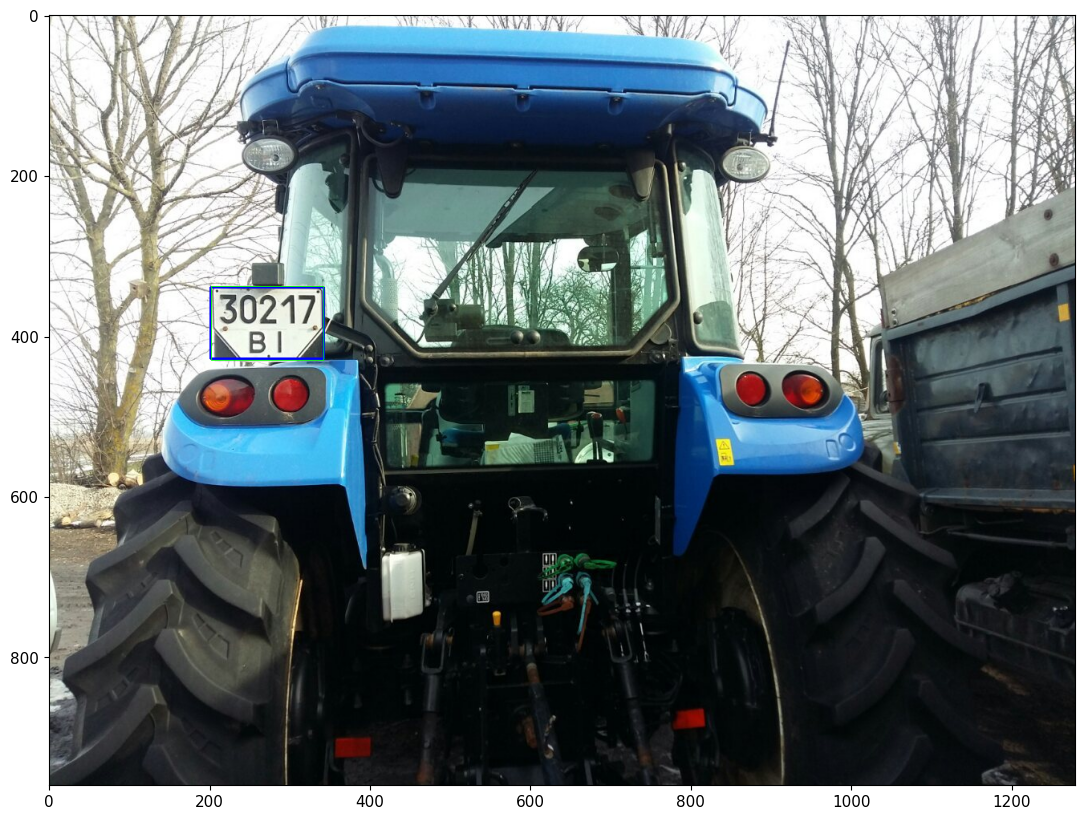

[INFO] image_region_ids [12]
[INFO] image_region_names ['su']
[INFO] image_count_lines [2]
[INFO] image_confidences [[1.0, 0.9999998807907104]]


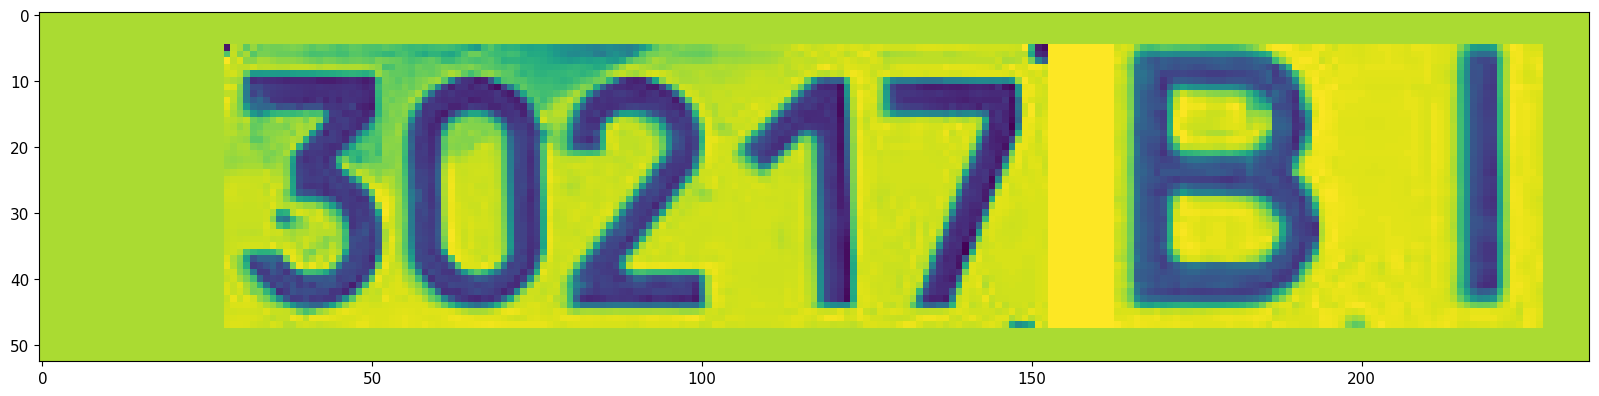

- NAME:29.jpeg TRUE:7686ZC PREDICTED:['144КГРБ']
[INFO] images_bboxs [[        633         519         743         644     0.90988           0]]
[INFO] image_points [[[642.8164949762802, 640.3725992990092], [633.0, 538.9354823188739], [733.1835022000243, 529.2403038328846], [743.0, 630.6774166126056]]]


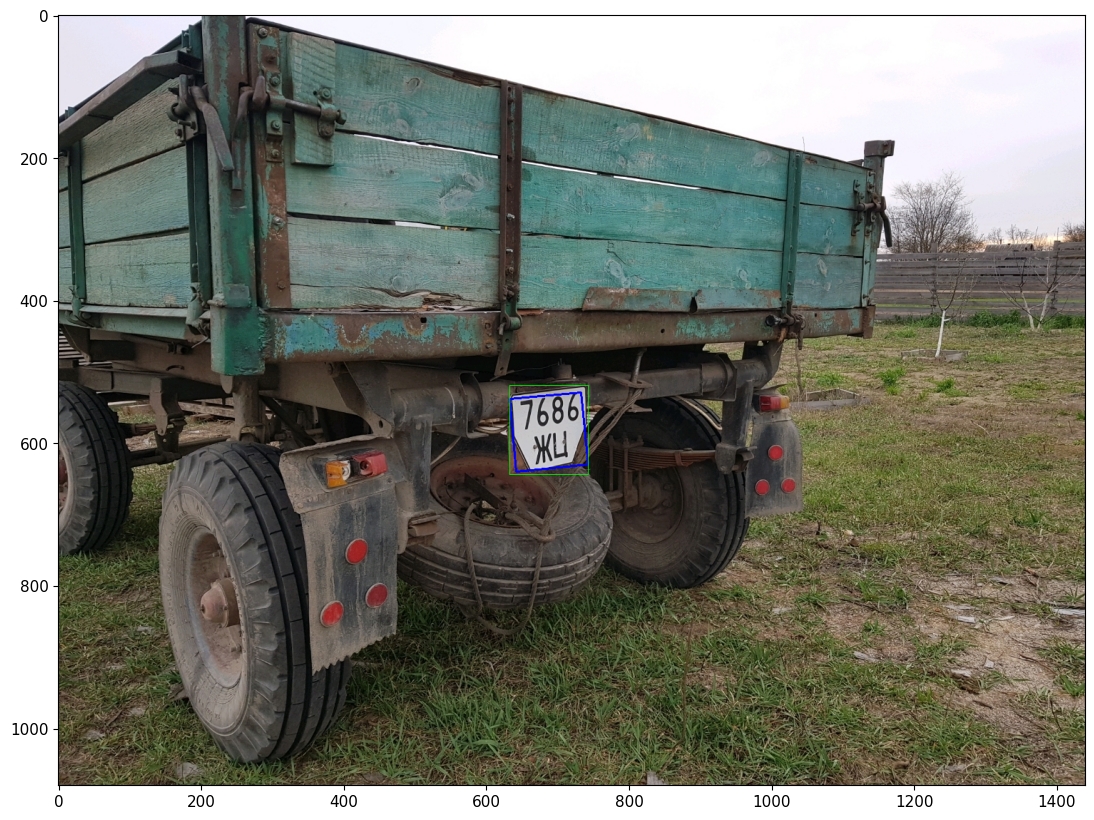

[INFO] image_region_ids [12]
[INFO] image_region_names ['su']
[INFO] image_count_lines [2]
[INFO] image_confidences [[1.0, 0.9999997615814209]]


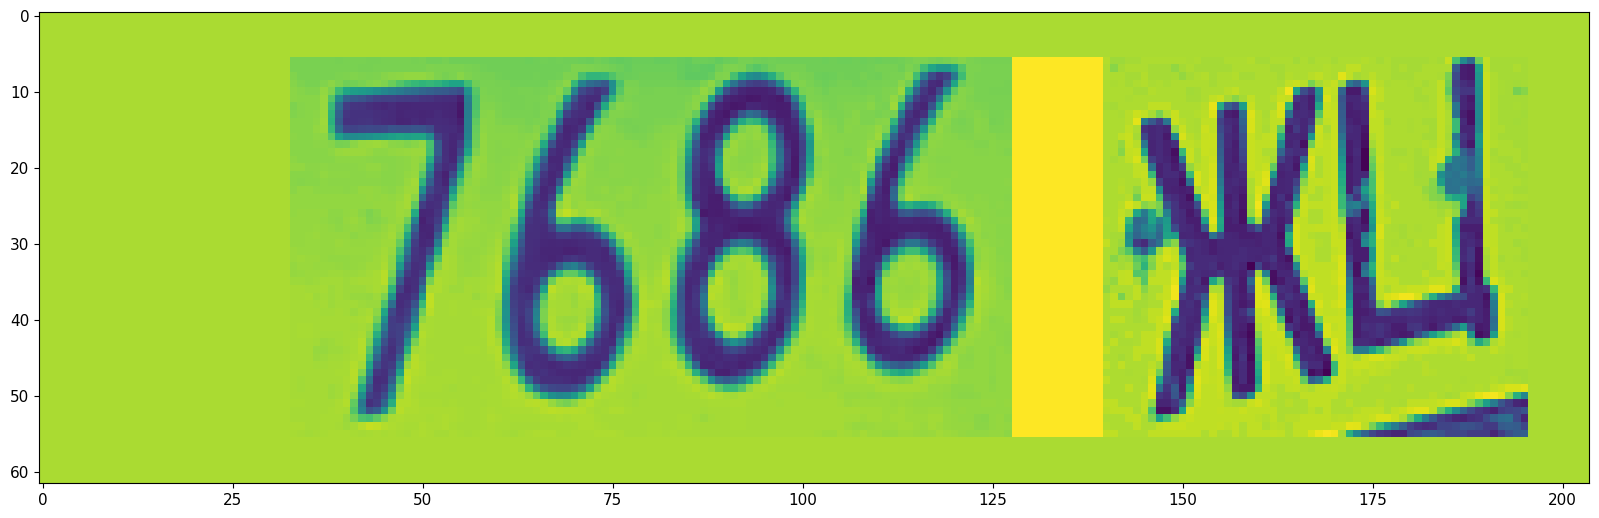

TOTAL GOOD: 0.0
TOTAL BAD: 1.0


In [6]:
number_plate_detection_and_reading.text_accuracy_test_from_file(
    os.path.join(nomeroff_net_dir, "./data/examples/accuracy_test_data_example.json"),
    texts, image_paths,
    images, images_bboxs,
    images_points, images_zones,
    region_ids, region_names,
    count_lines, confidences,
    matplotlib_show=True)